In [1]:
from Set import *
import pandas as pd
import db

In [12]:
set_id = 40539

In [11]:
new_set = Set(set_id)

More than one set ID found in title: Lego GwP 40591 + Ahsoka 40539 + moneta + 30654
More than one set ID found in title: Klocki Lego Star Wars 40539 Ahsoka + 40547 Obi-Wan Vader NOWE
More than one set ID found in title: zestaw 40547 Obi-Wan Kenobi, Darth Vader 40539 Ahsoka Tano Star Wars


In [4]:
df = pd.DataFrame(
        [offer.get_tuple()[1:] for offer in new_set.offers],
        index=[offer.offer_id for offer in new_set.offers],
        columns=['url', 'set_id', 'date_added', 'date_sold', 'title', 'description', 'price', 'is_negotiable', 'is_active']
    )
df.head()

,url,set_id,date_added,date_sold,title,description,price,is_negotiable,is_active
CID88-IDPRacA,https://www.olx.pl/d/oferta/lego-brick-headz-4...,40539.0,2023-05-18,None,LEGO Brick Headz 40539 Ahsoka nowe,Na sprzedaz nowy zestaw z prywatnej kolekcji L...,80.0,False,True
CID4042-IDQbXvq,https://www.olx.pl/d/oferta/ahsoka-lego-brickh...,40539.0,2023-05-08,None,Ahsoka lego Brickheadz 40539 (Lego Star Wars) ...,"Dzien dobry, Nowy Zestaw LEGO BrickHeadz - Ah...",55.0,False,True
CID88-IDUtueX,https://www.olx.pl/d/oferta/lego-40539-brickhe...,40539.0,2023-05-15,None,LEGO® 40539 BrickHeadz - Ahsoka Tano,Do sprzedania zestaw LEGO® 40539 BrickHeadz - ...,55.0,True,True
CID88-IDTHnuI,https://www.olx.pl/d/oferta/lego-40539-ahsoka-...,40539.0,2023-04-17,None,LEGO 40539 Ahsoka Tano,"Zestaw nowy, zamkniety, zaplombowany oryginaln...",55.0,False,True
CID88-IDSqml7,https://www.olx.pl/d/oferta/lego-star-wars-405...,40539.0,2023-04-20,None,Lego Star Wars 40539 Ahsoka Tano,Nowe oryginalne klocki Lego Star Wars 40539 Ah...,60.0,False,True


In [5]:
# df.info()

In [6]:
new_set.update_db()

--------------------------------------
Set 40539 sold for 49.99zł after 16 days: https://www.olx.pl/d/oferta/lego-brickheadz-40539-ahsoka-tan-CID88-IDUmzxU.html
--------------------------------------
Offers for set 40539 updated


In [12]:
df = pd.DataFrame(db.get_offers(set_id), columns=['offer_id', 'url', 'set_id', 'date_added', 'date_sold', 'title', 'description', 'price', 'is_negotiable', 'is_active'])

In [13]:
filtr = df['date_sold'].notnull()

df_sold = df[filtr]
df_sold

,offer_id,url,set_id,date_added,date_sold,title,description,price,is_negotiable,is_active
4,CID88-IDUpj2g,https://www.olx.pl/d/oferta/lego-40539-ahsoka-...,40539,2023-05-05,2023-05-16,Lego 40539 - Ahsoka Tano,Sprzedam: Lego 40539 - Ahsoka Tano Zestaw nowy...,50.00,0,0
8,CID88-IDUt3yo,https://www.olx.pl/d/oferta/lego-brickheadz-40...,40539,2023-05-08,2023-05-16,Lego Brickheadz 40539 Ahsoka Tano,Zestaw nowy nieotwierany. Pudelko w idealnym s...,45.00,0,0
9,CID88-IDUmzxU,https://www.olx.pl/d/oferta/lego-brickheadz-40...,40539,2023-05-02,2023-05-18,lego brickheadz 40539 Ahsoka Tan,"Czesc, posiadam na sprzedaz nowe, fabrycznie z...",49.99,0,0
11,CID88-IDUoexc,https://www.olx.pl/d/oferta/lego-40539-brickhe...,40539,2023-05-03,2023-05-17,LEGO 40539 BrickHeadz - Ahsoka Tano - NOWE Wro...,"Sprzedam nowy, fabrycznie zaplombowany, zestaw...",49.90,0,0
43,CID88-IDUA5XV,https://www.olx.pl/d/oferta/lego-star-wars-405...,40539,2023-05-16,2023-05-17,LEGO Star Wars 40539 Ahsoka Tano Brickheadz,"Witam, Mam na sprzedaz zestaw LEGO Star Wars...",40.00,0,0


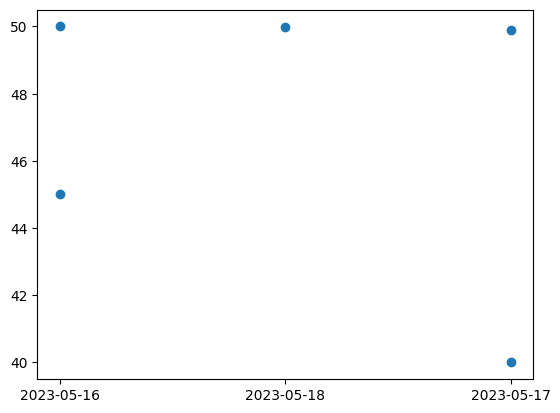

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df_sold['date_sold'], df_sold['price'])